In [4]:
#Importing libraries
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import yfinance as yf

In [5]:
#Creating the TSLA ticker object with the yfinance method .Ticker which takes a string value of
#a stock's ticker on a stock exchange
tsla = yf.Ticker("TSLA")

In [6]:
#Use the ticker object method .history() and setting period to max (covers all historical data).
#Assign data output to variable "tesla_data" which is a Pandas data frame
tesla_data = tsla.history(period="max")

In [7]:
tesla_data.reset_index(inplace=True)

In [8]:
#prints the historical data contained in the tesla_data dataframe
print(tesla_data)

                          Date        Open        High         Low   
0    2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333  \
1    2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333   
2    2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333   
3    2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333   
4    2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333   
...                        ...         ...         ...         ...   
3228 2023-04-26 00:00:00-04:00  160.289993  160.669998  153.139999   
3229 2023-04-27 00:00:00-04:00  152.639999  160.479996  152.369995   
3230 2023-04-28 00:00:00-04:00  160.899994  165.000000  157.320007   
3231 2023-05-01 00:00:00-04:00  163.169998  163.279999  158.830002   
3232 2023-05-02 00:00:00-04:00  161.880005  165.490005  158.929993   

           Close     Volume  Dividends  Stock Splits  
0       1.592667  281494500        0.0           0.0  
1       1.588667  257806500        0.0           

In [9]:
#Prints the first five rows of dataframe tesla_data using the head method
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [10]:
#Generates descriptibe statistics about the data set
tesla_data.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3233.000000,3233.000000,3233.000000,3233.000000,3.233000e+03,3233.0,3233.000000
mean,61.818221,63.212603,60.288778,61.782732,9.539269e+07,0.0,0.002474
std,96.271378,98.489158,93.779810,96.160394,8.164597e+07,0.0,0.102536
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,9.488000,9.710000,9.299333,9.479333,4.357800e+07,0.0,0.000000
50%,16.490000,16.726667,16.280001,16.504667,7.743300e+07,0.0,0.000000
75%,36.492668,37.629333,35.489334,36.480000,1.213455e+08,0.0,0.000000
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,0.0,5.000000


In [11]:
#Shape gives us literally the shape of the dataset: how many columns and rows it has. In this case,
#tesla_data has 3,233 rows and 8 columns.
tesla_data.shape

(3233, 8)

In [12]:
#What if we want to know the max of each column? Or the min?
print(tesla_data.max())
print(tesla_data.min())
print(tesla_data.mean())

#We can see the the max date range is May 2, 2023 and the min date range is June 29, 2010.
#Therefore, we can conclude that the data set spans 13 years. 

Date            2023-05-02 00:00:00-04:00
Open                           411.470001
High                           414.496674
Low                            405.666656
Close                          409.970001
Volume                          914082000
Dividends                             0.0
Stock Splits                          5.0
dtype: object
Date            2010-06-29 00:00:00-04:00
Open                                1.076
High                             1.108667
Low                              0.998667
Close                            1.053333
Volume                            1777500
Dividends                             0.0
Stock Splits                          0.0
dtype: object
Date            2016-11-28 05:17:55.657284608-05:00
Open                                      61.818221
High                                      63.212603
Low                                       60.288778
Close                                     61.782732
Volume                              9539

In [13]:
#what if we wanted to know the max value of only the close column? You pass the name of the column in as a string argument
#to the tesla data frame
max_value = tesla_data['Close'].max()

In [14]:
print(max_value)

409.9700012207031


In [15]:
#What if we wanted to get the date of where the close value was at its max?
#In this case, we know that the date column is the index, so we simply get the index value
#where the close column has the max value. 
print(tesla_data[tesla_data['Close']==max_value].index.values)

[2859]


In [16]:
#Finally, to plot the time series, import pyplot from matplotlib and seaborn which works
#closely with matplotlib to graph the timeseries. We use the method "lineplot" from seaborn
# to plot the time series. 
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: xlabel='Date', ylabel='Close'>

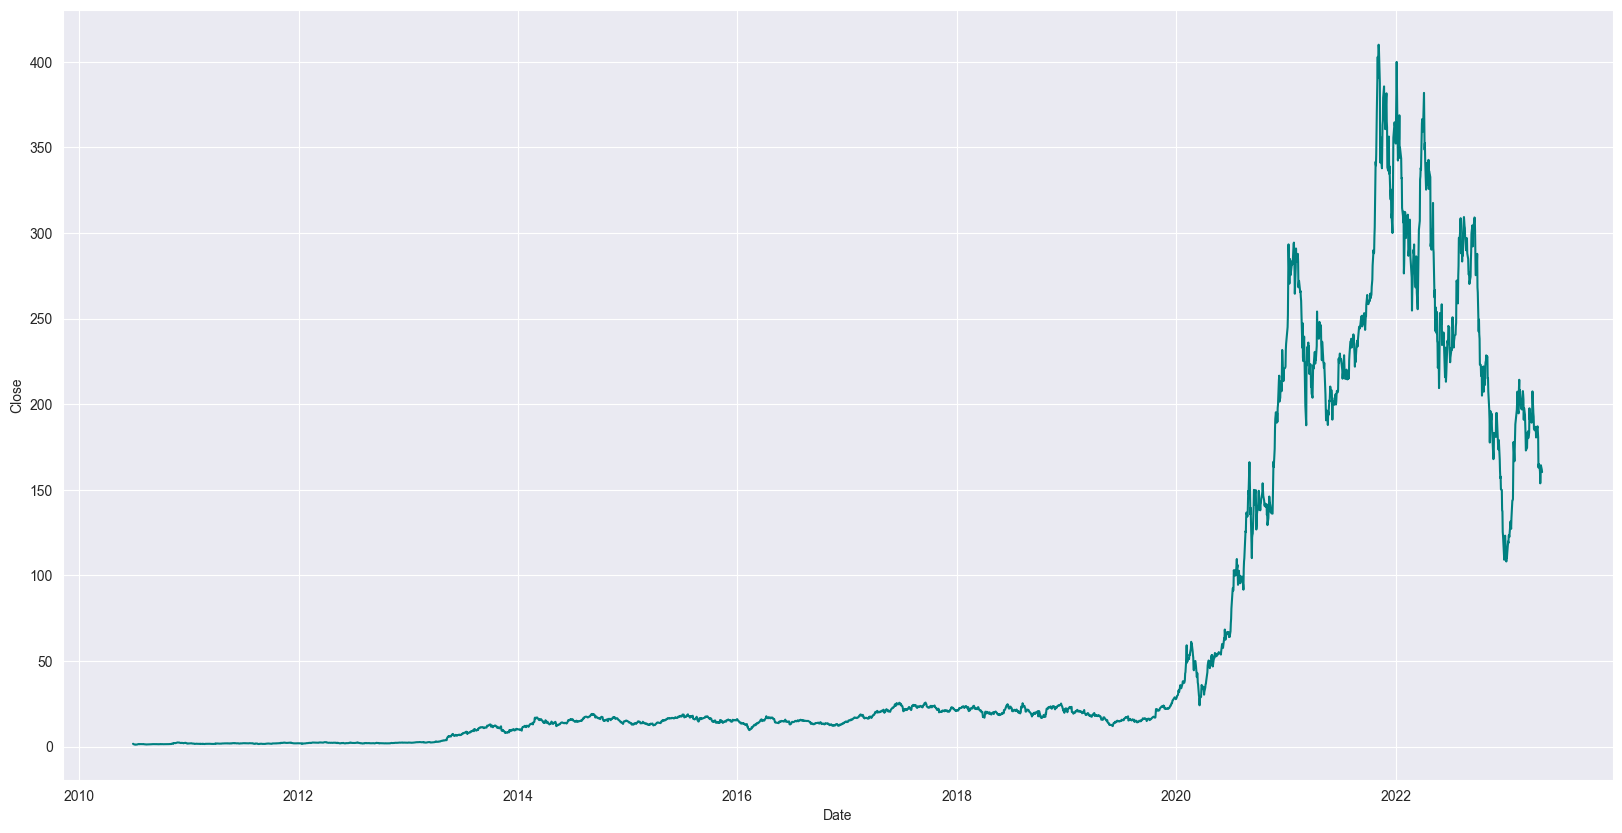

In [21]:
plt.figure(figsize=(20, 10))
sb.set_style("darkgrid")
sb.lineplot(data=tesla_data, x="Date", y='Close', color='teal')